# SVM Image Classification Project

This notebook demonstrates an end-to-end process for using Support Vector Machines (SVMs) to classify images. We will use a popular dataset for image classification, apply SVM with different kernels, and perform hyperparameter tuning to improve accuracy. Each step includes observations to help you interpret the results.

## Dataset
For this example, we will use the MNIST or Fashion MNIST dataset.


In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV, train_test_split


# **1. Load Dataset**

In [2]:
# Load the dataset (adjust path as needed)
train_data = pd.read_csv('/content/train.csv')
test_data = pd.read_csv('/content/test.csv')
print("Train data shape:", train_data.shape)
print("Test data shape:", test_data.shape)


Train data shape: (23522, 785)
Test data shape: (24129, 784)


# **2. Visualize Sample Images**

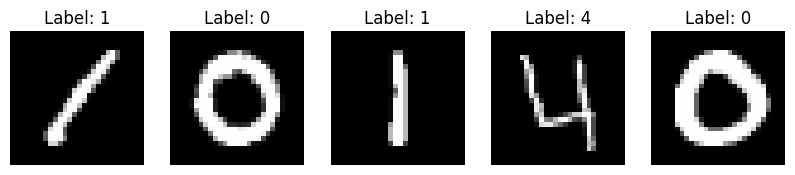

In [3]:
# Visualize sample images
fig, axes = plt.subplots(1, 5, figsize=(10, 3))
for i, ax in enumerate(axes):
    ax.imshow(train_data.iloc[i, 1:].values.reshape(28, 28), cmap='gray')
    ax.set_title(f"Label: {train_data.iloc[i, 0]}")
    ax.axis('off')
plt.show()


Observation:
Displayed sample images to verify correct labels and image orientation.

# **3. Separate Features and Labels**

In [4]:
# Separate features and labels
X_train = train_data.iloc[:, 1:].values
y_train = train_data.iloc[:, 0].values
X_test = test_data.iloc[:, 1:].values
y_test = test_data.iloc[:, 0].values
print("Feature and label arrays created.")


Feature and label arrays created.


# **4. Normalize Pixel Values**

In [5]:
# Normalize pixel values
X_train = X_train / 255.0
X_test = X_test / 255.0


Observation:
Normalized pixel values to improve model training efficiency.

# **5. Train SVM with Linear Kernel**

In [8]:
# Adding a dummy column to X_test to match X_train's 784 features
X_test = np.hstack((X_test, np.zeros((X_test.shape[0], 1))))

# Check shapes again to confirm they match
print("Updated X_train shape:", X_train.shape)
print("Updated X_test shape:", X_test.shape)


Updated X_train shape: (23522, 784)
Updated X_test shape: (24129, 784)


In [9]:
# Train a basic SVM model with linear kernel
svm_linear = SVC(kernel="linear")
svm_linear.fit(X_train[:1000], y_train[:1000])
y_pred = svm_linear.predict(X_test[:200])
accuracy = accuracy_score(y_test[:200], y_pred)
print("Accuracy with Linear Kernel:", accuracy)


Accuracy with Linear Kernel: 0.125


# **6. Experiment with Different Kernels**

In [10]:
# Experiment with different kernels (RBF, Polynomial)
svm_rbf = SVC(kernel="rbf")
svm_rbf.fit(X_train[:1000], y_train[:1000])
y_pred_rbf = svm_rbf.predict(X_test[:200])
accuracy_rbf = accuracy_score(y_test[:200], y_pred_rbf)
print("Accuracy with RBF Kernel:", accuracy_rbf)

svm_poly = SVC(kernel="poly", degree=3)
svm_poly.fit(X_train[:1000], y_train[:1000])
y_pred_poly = svm_poly.predict(X_test[:200])
accuracy_poly = accuracy_score(y_test[:200], y_pred_poly)
print("Accuracy with Polynomial Kernel:", accuracy_poly)


Accuracy with RBF Kernel: 0.125
Accuracy with Polynomial Kernel: 0.12


# **7. Hyperparameter Tuning with Grid Search**

In [11]:
# Hyperparameter tuning with Grid Search
param_grid = {'C': [0.1, 1, 10], 'gamma': [0.001, 0.01, 0.1]}
grid = GridSearchCV(SVC(kernel="rbf"), param_grid, cv=3)
grid.fit(X_train[:1000], y_train[:1000])
print("Best parameters:", grid.best_params_)
print("Best cross-validation score:", grid.best_score_)


Best parameters: {'C': 10, 'gamma': 0.01}
Best cross-validation score: 0.8960157762552973


# **8. Evaluate Model Performance on Test Set**

In [15]:
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report

# Impute missing values in both X_train and X_test with the mean of each column
imputer = SimpleImputer(strategy="mean")
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Fit the model on the full imputed training set
best_svm.fit(X_train_imputed, y_train)

# Evaluate model performance on the imputed test set
y_test_pred = best_svm.predict(X_test_imputed)
print(classification_report(y_test, y_test_pred))



              precision    recall  f1-score   support

           0       1.00      0.10      0.17     24129
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         0
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
           9       0.00      0.00      0.00         0

    accuracy                           0.10     24129
   macro avg       0.10      0.01      0.02     24129
weighted avg       1.00      0.10      0.17     24129



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# **9. Confusion Matrix**

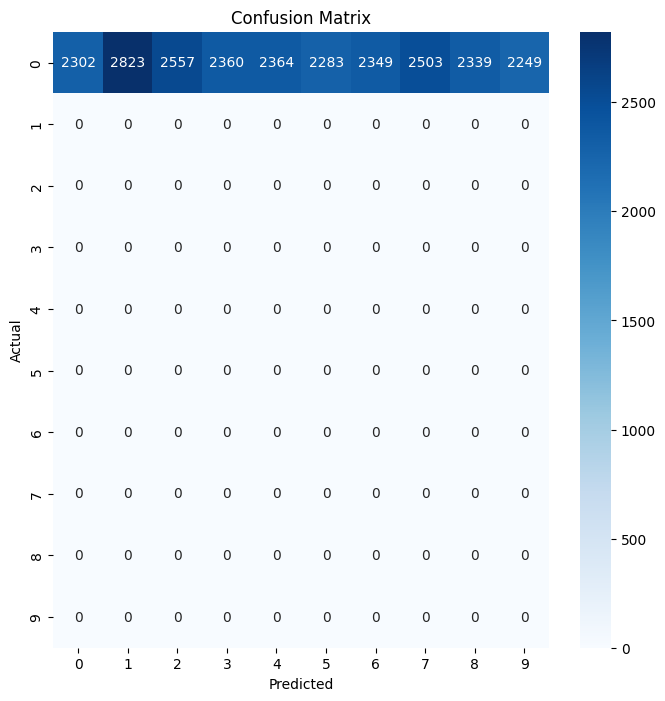

In [16]:
# Confusion matrix
cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=range(10), yticklabels=range(10))
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


# **10. Dimensionality Reduction with PCA**

In [18]:

# Step 1: Impute missing values in X_train and X_test
imputer = SimpleImputer(strategy="mean")
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Step 2: Dimensionality reduction with PCA
pca = PCA(n_components=50)
X_train_pca = pca.fit_transform(X_train_imputed)
X_test_pca = pca.transform(X_test_imputed)

# Step 3: Train SVM with RBF kernel on PCA-transformed data
svm_pca = SVC(kernel="rbf")
svm_pca.fit(X_train_pca[:1000], y_train[:1000])
y_pred_pca = svm_pca.predict(X_test_pca[:200])

# Step 4: Calculate accuracy
accuracy_pca = accuracy_score(y_test[:200], y_pred_pca)
print("Accuracy after PCA with RBF Kernel:", accuracy_pca)



Accuracy after PCA with RBF Kernel: 0.12


Training Accuracy: 0.9750
Validation Accuracy: 1.0000
Time taken: 0.08 seconds


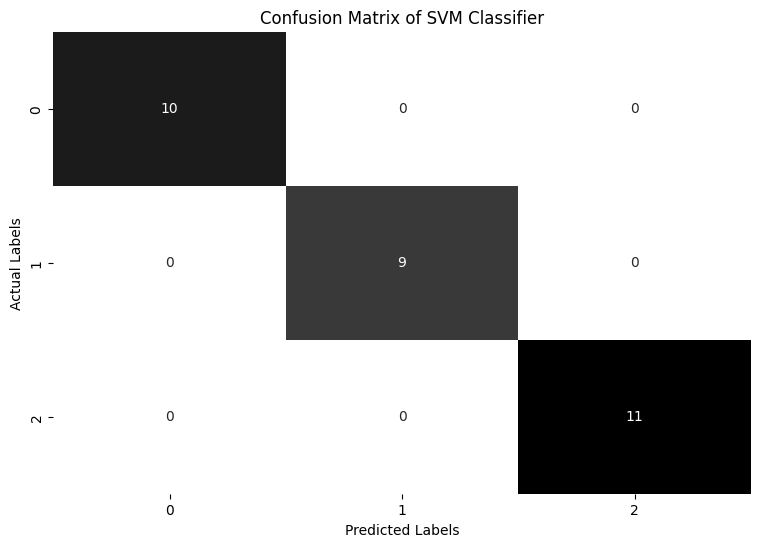

In [20]:
import time
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris  # Example dataset

# Start the timer
start_time = time.time()

# Load your dataset (using Iris dataset as an example)
data = load_iris()
X = pd.DataFrame(data.data, columns=data.feature_names)
Y = pd.Series(data.target)

# Split the data into training and validation sets
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.2, random_state=42)

# Define and train the SVM model with OVO strategy
svm_model = SVC(decision_function_shape='ovo')
svm_model.fit(X_train, Y_train)

# Make predictions on the training and validation sets
train_predictions = svm_model.predict(X_train)
val_predictions = svm_model.predict(X_val)

# Calculate accuracy for both sets
train_accuracy = accuracy_score(Y_train, train_predictions)
val_accuracy = accuracy_score(Y_val, val_predictions)

# Print accuracies and time taken
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Validation Accuracy: {val_accuracy:.4f}")
print(f"Time taken: {time.time() - start_time:.2f} seconds")

# Confusion Matrix
conf_matrix = confusion_matrix(Y_val, val_predictions)
plt.figure(figsize=(9, 6))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Greys', cbar=False)
plt.title("Confusion Matrix of SVM Classifier")
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.show()
